# Running Deep learning models with ImJoy App Engine

This tutorial demonstrate how to run CellPose (C Stringer et. al 2021) with ImJoy App Engine.
 
Note: Please be aware that the data will be sent to a remote server (https://ai.imjoy.io/triton) running by the ImJoy team, the service is for evaluation purpose only and it is subject to change without notice. In the near future we will release the deployment toolkit so you can also run your own server easily.

In [57]:
import micropip
await micropip.install('pyotritonclient')

from js import fetch
import io
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pyotritonclient import get_config, execute_model

async def fetch_image(url, name=None, grayscale=False, size=None):
    response = await fetch(url)
    bytes = await response.arrayBuffer()
    bytes = bytes.to_py()
    buffer = io.BytesIO(bytes)
    buffer.name = name or url.split('?')[0].split('/')[1]
    image = Image.open(buffer)
    if grayscale:
        image = image.convert('L')
    if size:
        image = image.resize(size=size)
    image = np.array(image)
    return image

# Run CellPose for cell segmentation

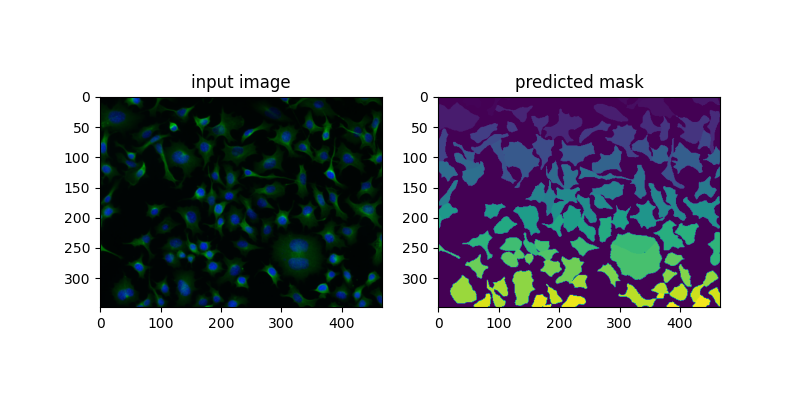

In [59]:
image = await fetch_image('https://static.imjoy.io/img/img02.png')
image = image.astype('float32')
diameter = {'diameter': 30}

# obtain the model config
config = await get_config('https://ai.imjoy.io/triton', 'cellpose-cyto-python')

# run inference
results = await execute_model([image.transpose(2, 0, 1), diameter], config=config, decode_bytes=True)
mask = results['mask']

# display the output
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(image.astype('uint8'))
ax1.set_title('input image')
ax2.imshow(mask[0])
ax2.set_title('predicted mask')
plt.show()